In [2]:
!python --version

Python 3.10.9


# Importing required libraries

In [14]:
import sys
sys.path.insert(0, 'D:/Study/pypacka')

import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocessing of dataset

In [15]:
#imorting dataset
root_cause = pd.read_csv('root_cause_analysis.csv')
print(root_cause.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [16]:
#Seperate target and feature variables
target = root_cause['ROOT_CAUSE']
feature = root_cause.to_numpy()
feature = feature[:, 1 : 8]
feature

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0]], dtype=object)

In [17]:
#Encode feature to numeric form using standard scaler
scaler = StandardScaler().fit(feature)
feature = scaler.transform(feature)
feature

array([[-0.94548368, -0.84747452, -0.80632811, ...,  1.03046381,
        -0.87210285,  1.27462619],
       [-0.94548368, -0.84747452, -0.80632811, ..., -0.97043679,
        -0.87210285,  1.27462619],
       [-0.94548368,  1.17997648,  1.24018993, ..., -0.97043679,
         1.14665375,  1.27462619],
       ...,
       [ 1.05765971,  1.17997648,  1.24018993, ..., -0.97043679,
        -0.87210285, -0.78454374],
       [-0.94548368,  1.17997648,  1.24018993, ...,  1.03046381,
        -0.87210285, -0.78454374],
       [ 1.05765971, -0.84747452, -0.80632811, ...,  1.03046381,
         1.14665375, -0.78454374]])

In [20]:
#Encode target cause using one hot encoding after converting it numbers
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
targer = label_encoder.fit_transform(target)
target = tf.keras.utils.to_categorical(targer, 3)
target

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [21]:
#Splitting data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.10)
X_train

array([[-0.94548368, -0.84747452,  1.24018993, ...,  1.03046381,
        -0.87210285, -0.78454374],
       [ 1.05765971, -0.84747452, -0.80632811, ..., -0.97043679,
         1.14665375, -0.78454374],
       [ 1.05765971, -0.84747452, -0.80632811, ..., -0.97043679,
         1.14665375, -0.78454374],
       ...,
       [-0.94548368, -0.84747452, -0.80632811, ..., -0.97043679,
        -0.87210285,  1.27462619],
       [-0.94548368,  1.17997648, -0.80632811, ..., -0.97043679,
        -0.87210285, -0.78454374],
       [-0.94548368,  1.17997648,  1.24018993, ..., -0.97043679,
         1.14665375,  1.27462619]])

# Building model

In [22]:
#Creating a sequential model
model = tf.keras.models.Sequential()

#Hyper parameters
NB_classes = 3
hidden = 64
X_train[0].shape

(7,)

In [23]:
#Adding first hidden layer 
model.add(tf.keras.layers.Dense(hidden,
                                input_shape = (7,),
                                name = "HL1",
                                activation = "relu"
))

model.add(tf.keras.layers.Dense(hidden,
                                name = "HL2",
                                activation = "relu"
))

model.add(tf.keras.layers.Dense(NB_classes,
                                name = "Output",
                                activation = "softmax"
))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 64)                512       
                                                                 
 HL2 (Dense)                 (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 3)                 195       
                                                                 
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________


# Compiling Model with loss, metrics and Training the model

Epoch 1/10
7/7 [==============================] - 1s 61ms/step - loss: 1.0517 - accuracy: 0.5025 - val_loss: 0.9237 - val_accuracy: 0.7111
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.8405 - accuracy: 0.7704 - val_loss: 0.8067 - val_accuracy: 0.7333
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.7112 - accuracy: 0.8086 - val_loss: 0.7241 - val_accuracy: 0.7667
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6172 - accuracy: 0.8235 - val_loss: 0.6743 - val_accuracy: 0.7444
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5490 - accuracy: 0.8370 - val_loss: 0.6456 - val_accuracy: 0.7444
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5010 - accuracy: 0.8469 - val_loss: 0.6311 - val_accuracy: 0.7444
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4698 - accuracy: 0.8494 - val_loss: 0.6274 - val_accuracy: 0.7667
Epoch 8/10
7/7 [===========

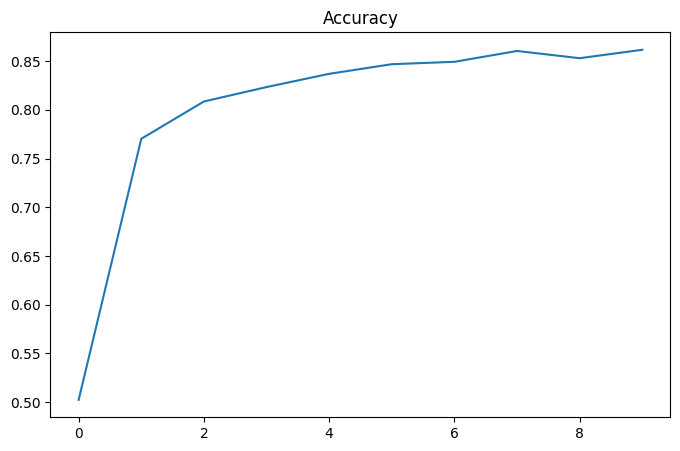

4/4 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8200


[0.4612051844596863, 0.8199999928474426]

In [24]:
#Compiling model
model.compile(loss = "categorical_crossentropy", metrics = ['accuracy'])

#Training model
model_data = model.fit(X_train, #Training input data
                    Y_train, #Training output data
                    batch_size = 128, #batch_size
                    epochs = 10,
                    verbose = 1,
                    validation_split = 0.1 #20% is used here as dataset is not that big
                   )
import matplotlib.pyplot as plt
pd.DataFrame(model_data.history)['accuracy'].plot(figsize = (8,5))

plt.title('Accuracy')
plt.show()

#Evaluate
model.evaluate(X_test, Y_test)

# Predicting with model 

In [28]:
# Raw prediction
pred = [[0,0,0,0,1,0,1]]
raw_predict = model.predict(pred)
raw_predict

1/1 [==============================] - 0s 64ms/step


array([[0.26049432, 0.52531725, 0.21418849]], dtype=float32)

In [29]:
#True prediction
predicted = np.argmax(raw_predict)
str_pred =label_encoder.inverse_transform([predicted])
str_pred

array(['MEMORY_LEAK'], dtype=object)